In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

import sys
import os

# Append the parent directory to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [2]:
from dotenv import load_dotenv

from research.trades_db_utils import create_connection

load_dotenv()
DB_HOSTNAME = os.getenv('DB_HOSTNAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')

In [3]:
# Config

coin_name = 'yezus'
ticker = 'BTCUSDT'


In [6]:
conn = create_connection(DB_HOSTNAME, 'CoinTrades', DB_USER, DB_PASSWORD)
cursor = conn.cursor()

select_query = f"""
    select coin_name, signature, sol_amount, token_amount, is_buy, timestamp
    from (
        select *
        from CoinTrades.trades
    ) t
    join CoinTrades.coins c on c.id = t.coin_id
    where coin_name = '{coin_name}'
"""

cursor.execute(select_query)

row = cursor.fetchall()
conn.close()

df = pd.DataFrame(row, columns=['coin_name', 'signature', 'sol_amount', 'token_amount', 'is_buy', 'timestamp'])
df.sort_values(by='timestamp', ascending=False, inplace=True)
df.head(5)

,coin_name,signature,sol_amount,token_amount,is_buy,timestamp
0,yezus,4J8Tq16WgTmRFVh3W8TQsfX4AWyiYFZ7dxUueg9HaSSvZs...,0.0150,514991348295.00,0,1740260305
1,yezus,2FLr2EUTLYCgX4u793KGkMhNY7hHLgqR6W2gqzGr7nhzgx...,0.0150,514991348295.00,1,1740260305
3,yezus,2FLr2EUTLYCgX4u793KGkMhNY7hHLgqR6W2gqzGr7nhzgx...,0.0150,514991348295.00,0,1740260305
2,yezus,4J8Tq16WgTmRFVh3W8TQsfX4AWyiYFZ7dxUueg9HaSSvZs...,0.0150,514991348295.00,1,1740260305
5,yezus,3Zy4LaQcGbUBmroN8UGdxNnFBzErLt3CcxmRqhVCKdnDKt...,0.0150,514991348295.00,0,1740260305


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head(5)

,coin_name,signature,sol_amount,token_amount,is_buy,timestamp
0,yezus,4J8Tq16WgTmRFVh3W8TQsfX4AWyiYFZ7dxUueg9HaSSvZs...,0.0150,514991348295.00,0,2025-02-22 21:38:25
1,yezus,2FLr2EUTLYCgX4u793KGkMhNY7hHLgqR6W2gqzGr7nhzgx...,0.0150,514991348295.00,1,2025-02-22 21:38:25
3,yezus,2FLr2EUTLYCgX4u793KGkMhNY7hHLgqR6W2gqzGr7nhzgx...,0.0150,514991348295.00,0,2025-02-22 21:38:25
2,yezus,4J8Tq16WgTmRFVh3W8TQsfX4AWyiYFZ7dxUueg9HaSSvZs...,0.0150,514991348295.00,1,2025-02-22 21:38:25
5,yezus,3Zy4LaQcGbUBmroN8UGdxNnFBzErLt3CcxmRqhVCKdnDKt...,0.0150,514991348295.00,0,2025-02-22 21:38:25


Price statistics:
count                                   768
unique                                  302
top       5.822983010231671343271260637E-14
freq                                     12
Name: price_per_token, dtype: object


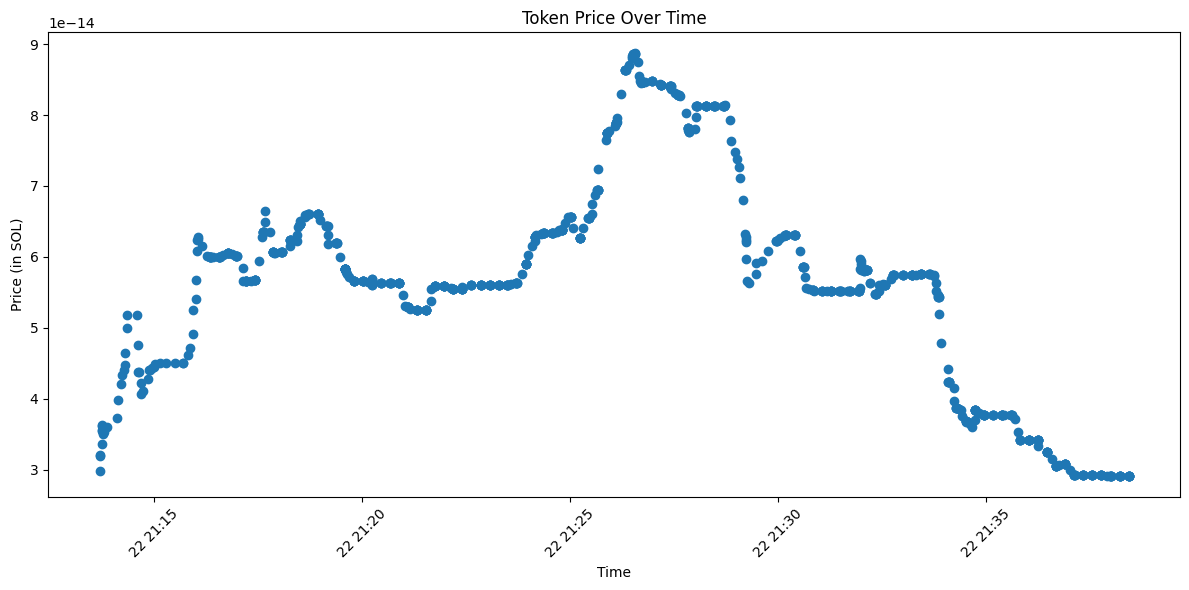

In [8]:
# If you want to handle potential division by zero or invalid values:
df['price_per_token'] = df.apply(
    lambda row: row['sol_amount'] / row['token_amount'] 
    if row['token_amount'] != 0 else np.nan, 
    axis=1
)

# You might want to look at the price statistics
print("Price statistics:")
print(df['price_per_token'].describe())

# Optionally, you can create a time series of prices
plt.figure(figsize=(12, 6))
plt.scatter(df['timestamp'], df['price_per_token'])
plt.title('Token Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (in SOL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()